<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Automated Trading

## Risk Disclaimer

<font size="-1">
Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.
</font>

## Author Disclaimer

The author is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

In [1]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import mpl, plt

In [2]:
np.random.seed(1000)
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Capital Management

### Kelly Criterion in a Binomial Setting

In [3]:
p = 0.55  

In [4]:
f = p - (1 - p)  

In [5]:
f  

0.10000000000000009

## 2p - 1, 0.55 * 2 - 1 = 0.1, f = 0.1, 因为计数方式的问题，实际上可能不是0.1
## f代表的是亏与赚之间的几率的差值，在设定每次投入为a的情况下，0.55a * 1 + 0.45a * -1 = 0.1。10%就是加权的收益率的期望值，因为赌博要不然就是投入金额翻倍，要不然就是投入的都打水漂了。所以可以用-1和1来代指赌博的两种results情况。

In [6]:
I = 50  

In [7]:
n = 100  

In [8]:
def run_simulation(f):
    c = np.zeros((n, I))  
    c[0] = 100  
    for i in range(I):  
        for t in range(1, n):  
            o = np.random.binomial(1, p)  
            if o > 0:  
                c[t, i] = (1 + f) * c[t - 1, i]  
            else:  
                c[t, i] = (1 - f) * c[t - 1, i]  
    return c

In [9]:
p

0.55

## 模拟出赌50次99局(不包括投入本金的那一次)，总共4950局的赌博， 50 * 99的表格，np.zeros((n, I)生成50 * 100的零矩阵， c[0] = 100，将50次第一局的本金设定为100(50个100作为第一行)，在后面100局下注赌的过程中，本金的balance不断改变，一直模拟到100局结束。
## for i in range(I):；for t in range(1, n):  两个loop来放入数值，因为输入的不是一列一列的list或者是numpy.array。每次只能放入一个数。
## o = np.random.binomial(1, p)是产生符合二项分布的数，1代表输出如果不是0就是1，也可以更改成a，那结果就是0或者a。p代表出现1的几率是0.55.
## c[t, i] = (1 + f) * c[t - 1, i]是赌赢了情况下100(本金的balance) * (1 + f)；赌输了就是(1 - f) * c[t - 1, i] = 100 * (1 - f)。

In [10]:
c_1 = run_simulation(f)  

In [11]:
c_1.round(2)[:1]

array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100.]])

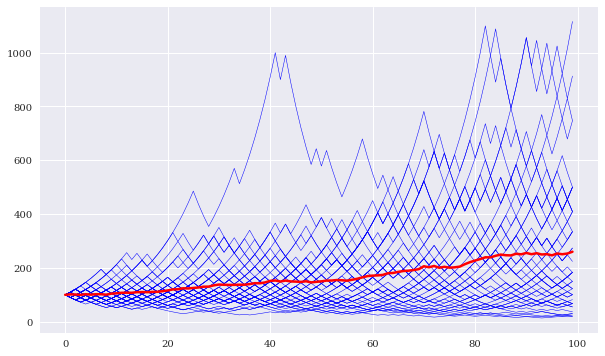

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)  
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);  
# plt.savefig('../../images/ch16/auto_plot_01.png');

## plt.plot(c_1.mean(axis=1), 'r', lw=2.5)画出一条由50条线在100局过程中的平均值组成的红色曲线。

In [13]:
p * np.log(1 + f) + (1 - p) * np.log(1 - f)

0.005008366846356839

In [14]:
np.log(2) /(p * np.log(1 + f) + (1 - p) * np.log(1 - f))

138.39784541025602

## 公式带入求出的收益率是0.5%的收益，Elog(Xn/X0) = p * np.log(1 + f) + (1 - p) * np.log(1 - f)
## log2 = Elog(Xn/X0) * n, 2是翻倍是结果值, E(Xn/X0) * n = sum加总， 等于2等于翻倍。
## stimulation的结果是在70局前后的时候平均值就达到200了，与公式结果存在差异，因为模拟只是能够做到在50次内的平均数，是样本平均值，或许随着样本个数的增加会回归到公式的结果。

In [15]:
import scipy.optimize as sco
def func(f):
    return p * np.log(1 + f) + (1 - p) * np.log(1 -f)
sco.fsolve(func, 0.4)
    

array([0.19866845])

In [16]:
c_2 = run_simulation(0.05)  

In [17]:
c_3 = run_simulation(0.25)  

In [18]:
c_4 = run_simulation(0.5)  

## 可以在P一定的情况下，用不同的每次拿出的用来赌博的金额占总的本金的比重来带入函数测试，得出结果相比极值点(最优解)p-q：10%，低于的收益上会更低，高于的波动率又明显提高。

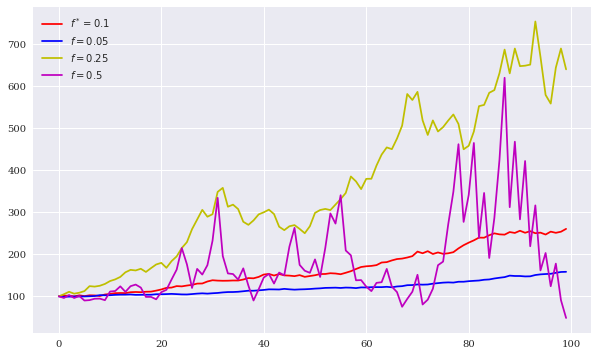

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0);
# plt.savefig('../../images/ch16/auto_plot_02.png');

## 从图中看好像0.25和0.5的结果是明显高于0.1的表现，但是由于只是做了50次99局的试验，所以结果的随机性很大，如果模拟的结果足够多，最后能够得到10%极值点在长期看会是最优的选择(最高的收益)。

### Kelly Criterion for Stocks and Indices

In [113]:
raw = pd.read_csv('./source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)

In [114]:
symbol = '.SPX'

In [115]:
data = pd.DataFrame(raw[symbol])

In [116]:
data.dropna(inplace=True)
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)

In [117]:
data.tail()

,.SPX,returns
Date,,
2018-06-25,2717.07,-0.013820
2018-06-26,2723.06,0.002202
2018-06-27,2699.63,-0.008642
2018-06-28,2716.31,0.006160
2018-06-29,2718.37,0.000758


In [118]:
mu = data.returns.mean() * 252  

In [119]:
mu  

0.10320234655244429

## 连续时间的报酬率是具有可加性，假设每一天returns是IID独立同分布的，总的波动率：std() * 252 ** 0.5  

In [120]:
sigma = data.returns.std() * 252 ** 0.5  

In [121]:
sigma  

0.14850862472464205

## 因为计算机可以处理大数据，所以使用的都是population总体的mean或者STD值。

In [122]:
r = 0.0  

In [123]:
f = (mu - r) / sigma ** 2 

## 连续情况下，Kelly公式求最值时f的取值。

In [124]:
f  

4.679357427386333

## 4.4672043679706865是大于1的，f是投入的比重，这个Kelly的最优解是指要超出本金的投入，要加大概3.5的杠杆，借高于本金3.5倍的资金作为投入。

In [125]:
equs = []

## enumerate是迭代的（iterable）/可遍历的对象（如列表、字符串），enumerate将其组成一个索引序列，利用它可以同时获得索引和值。第0个就是2010-01-05，有双层身份，i可以从这个dict当中取出索引，同时t可以从字典中取出对应的值，前面的是索引后面的是值。t_1 = data.index[i]相当于是shift的作用，data的第0个是2010-01-04正好是i = 0对应t的前一位.
## global equs定义全域变量

In [126]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1  
    data[cap] = data[equ] * f  
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]  
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['returns'].loc[t])  
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]  
        data.loc[t, cap] = data[equ].loc[t] * f  

## data[cap] = data[equ] * f是投入的金额，本金乘以f投入金额占本金的比重(可以是大于1的数，就是加杠杆，高于本金投入)。
## data.loc[t, cap]代表写入的cell的位置，iloc后面跟着的是index值，loc后面跟着的是index的value值，t代表从data里面取出来的时间代表新表equs的index的value，cap代表对应的输入不同f的cap值组成的columns名称。

In [127]:
math.exp(0.00311)

1.0031148410672721

## $\color{#FF0000}{3行函数代表：}$一是前一日的capital投入在当日returns的获得情况(returns在从ln值变到普通值的过程中会自带1 + r的效果，当ln值为正数时，经过math.exp的结果就是比1大的数，反之为负数时就是一个小于1的数，小于1的数乘以投入值代表亏损相应的数额，而大于1的数乘以投入就是盈利的数额)
## data[cap].loc[t_1]是cap代表投入的资金量，使用t_1代表使用的前一天的值，* math.exp()是因为使用的是连续时间的收益，所以在算策略结果需要变连续为离散(做成表格代表是每个时点对应的离散时间的收益)，data['returns'].loc[t]代表前一日投入赌注，第二天才能揭晓结果，赌的就是第二天的涨跌，赌赢了，自然获得第二天代表的returns，如果赌输了，亏损也是在投入额的限度内。
## 二是当日资金的capital和前一天的capital的差值对equity本金的影响：capital gains
## data[cap].loc[t] - data[cap].loc[t_1]前面的是收益了多少，capital gains，如果当期和前一期都是获得了收益，那就是收益差；如果前一期没有获得，但是当期获得了，那就是两期的returns的值；如果是前一期获得了，但是当期没有获得，那就是负数，就是亏损。因为前一期的returns的影响已经在equity本金上作用了，所以前面的相减就是调整项。后面的+ data[equ].loc[t_1]是前一期的本金，调整本金，是一个loop回圈。相当于是每天一调整(交割)，只赚取当天部分的收益。
## 三是最后调整后的equity乘以投入比重乘数f，代表下一期的capital投入资金量。
## data.loc[t, cap] = data[equ].loc[t] * f，因为equity本金变化了，所以需要对投入cap进行新的修改。而修改后的capital会用于下一次的投入。
## 最后每次的运行结果会让data有两行的增加，因为同名称的cell在写入两次的情况下，后面一次的结果会覆盖前面一次的。
## 结果里面的equs(equity本金)是调整后的本金；cap(capital本金)是调整后的capital投入，就是下一期的投入capital资金。

In [128]:
data

,.SPX,returns
Date,,
2010-01-05,1136.52,0.003111
2010-01-06,1137.14,0.000545
2010-01-07,1141.69,0.003993
2010-01-08,1144.98,0.002878
2010-01-11,1146.98,0.001745
...,...,...
2018-06-25,2717.07,-0.013820
2018-06-26,2723.06,0.002202
2018-06-27,2699.63,-0.008642


## 因为cap项会被改变一次，所以<font color=red>第一次</font>是收盘时，returns加上投入的本金，得到的收盘时在股票市场上的资金，而<font color=red>第二次</font>就是最后显示的，覆盖之前第一次结果的值，就是基于调整后的equity本金，下一期(第二天)投入股市的金额，可能会在原本的基础上因为本金的增加，而可以更多的借债增加投入股票市场的capital，也可能因为前一天的returns为负，本金减少，从而减少在股市当中的capital值。

In [129]:
data.index[1:]

DatetimeIndex(['2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11',
               '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
               '2010-01-19', '2010-01-20',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2136, freq=None)

In [130]:
kelly_strategy(f * 0.5)  ## 2.34

In [131]:
kelly_strategy(f * 0.66)  ## 3.09

In [132]:
kelly_strategy(f)  ## 4.68

In [133]:
kelly_strategy(f * 1.66)

In [134]:
data

,.SPX,returns,equity_2.34,capital_2.34,equity_3.09,capital_3.09,equity_4.68,capital_4.68,equity_7.77,capital_7.77
Date,,,,,,,,,,
2010-01-05,1136.52,0.003111,1.000000,2.339679,1.000000,3.088376,1.000000,4.679357,1.000000,7.767733
2010-01-06,1137.14,0.000545,1.001276,2.342665,1.001685,3.093579,1.002553,4.691302,1.004237,7.800649
2010-01-07,1141.69,0.003993,1.010650,2.364596,1.014063,3.131808,1.021324,4.779139,1.035450,8.043099
2010-01-08,1144.98,0.002878,1.017464,2.380539,1.023088,3.159680,1.035096,4.843584,1.058628,8.223138
2010-01-11,1146.98,0.001745,1.021622,2.390268,1.028607,3.176725,1.043556,4.883174,1.072992,8.334712
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,2717.07,-0.013820,5.721733,13.387016,8.029093,24.796859,11.485321,53.743923,5.272450,40.954984
2018-06-26,2723.06,0.002202,5.751245,13.456067,8.083760,24.965690,11.603804,54.298346,5.362738,41.656322
2018-06-27,2699.63,-0.008642,5.635466,13.185179,7.868948,24.302269,11.136605,52.112156,5.004315,38.872186


In [135]:
print(data[equs].tail())

            equity_2.34  equity_3.09  equity_4.68  equity_7.77
Date                                                          
2018-06-25     5.721733     8.029093    11.485321     5.272450
2018-06-26     5.751245     8.083760    11.603804     5.362738
2018-06-27     5.635466     7.868948    11.136605     5.004315
2018-06-28     5.716932     8.019103    11.458587     5.244492
2018-06-29     5.727076     8.037885    11.499250     5.275387


## 每次运行程序就是在原来的equs的基础上新增一栏。f * 0.5，f * 0.66，f3种f的投入得到的returns的值。
## tail看最后equity增长的结果，与预期相符，Kelly模型最值4.47的收益是最高的。

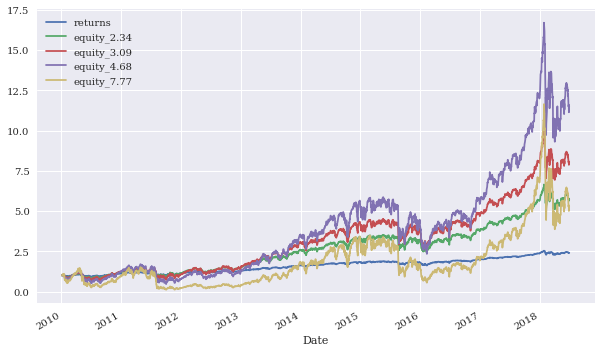

In [136]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10, 6))
data[equs].plot(ax=ax, legend=True);
# plt.savefig('../../images/ch16/auto_plot_03.png');

## data['returns'].cumsum()增加了一条returns的累计收益图，等于是在无操作(也不加杠杆)的情况下，它的累计收益是最低的。
## 同样的增加过多杠杆的情况下的7.77，也并没有因为杠杆的增加而获得一个更好的结果，说明Kelly的结果确实是最优的结果。

## ML-Based Trading Strategy

### Vectorized Backtesting

In [16]:
from alpha_vantage.timeseries import TimeSeries
import fxcmpy
api =  fxcmpy.fxcmpy('ff0c1a85a505ee00876333f5e732dda8063eeb02')
data = api.get_candles('EUR/USD', period = 'm5', start = '2018-06-01 00:00:00', stop = '2018-06-30 00:00:00')

|ERROR|2021-09-24 20:08:45,449|Socket returns unknown error.


ServerError: Can not connect to FXCM Server.

In [36]:
from yahoofinancials import YahooFinancials
yahoo_financials = YahooFinancials('EURUSD=X')
data = yahoo_financials.get_historical_price_data('2018-06-01 00:00:00', '2018-06-30 00:00:00', time_interval = '5m')

KeyError: '5m'

In [38]:
import requests
url = 'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=USD&to_currency=JPY&apikey=demo'
r = requests.get(url)
data = r.json()
print(data)

{'Realtime Currency Exchange Rate': {'1. From_Currency Code': 'USD', '2. From_Currency Name': 'United States Dollar', '3. To_Currency Code': 'JPY', '4. To_Currency Name': 'Japanese Yen', '5. Exchange Rate': '110.53600000', '6. Last Refreshed': '2021-09-24 12:41:43', '7. Time Zone': 'UTC', '8. Bid Price': '110.53460000', '9. Ask Price': '110.53940000'}}


In [ ]:
from  alpha_vantage.timeseries  import  TimeSeries 
ts  =  TimeSeries (key = 'OC3OTNFSK9UJJ36V',output_format = 'pandas') 
data ,  meta_data  =  ts .get_intraday ( symbol = 'MSFT' , interval = '5min' ,  outputsize = 'full' ) 
pprint ( data . head ( 2 ) )

In [35]:
yahoo_financials.get_historical_price_data?

In [25]:
historical_stock_prices = yahoo_financials.get_historical_price_data('2013-01-01', '2018-12-31', 'daily')

Object `yahoofinancials` not found.


In [17]:
ts.get_daily?

Object `ts.get_daily` not found.


In [3]:
data.iloc[-5:, 4:]

,askopen,askclose,askhigh,asklow,tickqty
date,,,,,


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6083 entries, 2018-06-01 00:00:00 to 2018-06-29 20:55:00
Data columns (total 9 columns):
bidopen     6083 non-null float64
bidclose    6083 non-null float64
bidhigh     6083 non-null float64
bidlow      6083 non-null float64
askopen     6083 non-null float64
askclose    6083 non-null float64
askhigh     6083 non-null float64
asklow      6083 non-null float64
tickqty     6083 non-null int64
dtypes: float64(8), int64(1)
memory usage: 475.2 KB


In [42]:
spread = (data['askclose'] - data['bidclose']).mean()  
spread  

2.6338977478217845e-05

In [43]:
data['midclose'] = (data['askclose'] + data['bidclose']) / 2  

In [44]:
ptc = spread / data['midclose'].mean()  
ptc  

2.255685318140426e-05

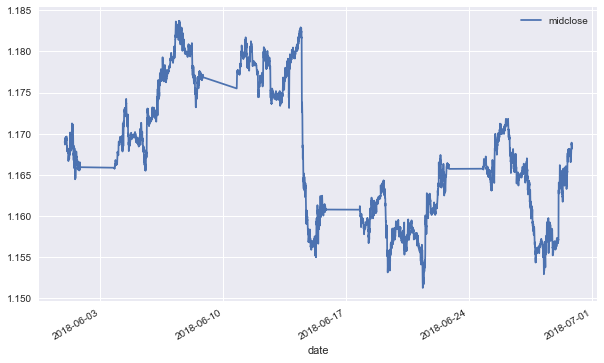

In [45]:
data['midclose'].plot(figsize=(10, 6), legend=True);
# plt.savefig('../../images/ch16/auto_plot_04.png');

In [46]:
data['returns'] = np.log(data['midclose'] / data['midclose'].shift(1))

In [47]:
data.dropna(inplace=True)

In [48]:
lags = 5

In [49]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['returns'].shift(lag)  
    cols.append(col)

In [50]:
data.dropna(inplace=True)

In [51]:
data[cols] = np.where(data[cols] > 0, 1, 0)  

In [52]:
data['direction'] = np.where(data['returns'] > 0, 1, -1)  

In [53]:
data[cols + ['direction']].head()

,lag_1,lag_2,lag_3,lag_4,lag_5,direction
date,,,,,,
2018-06-01 00:30:00,1,0,1,0,1,1
2018-06-01 00:35:00,1,1,0,1,0,1
2018-06-01 00:40:00,1,1,1,0,1,1
2018-06-01 00:45:00,1,1,1,1,0,1
2018-06-01 00:50:00,1,1,1,1,1,-1


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [55]:
model = SVC(C=1, kernel='linear')

In [56]:
split = int(len(data) * 0.80)

In [57]:
train = data.iloc[:split].copy()

In [58]:
model.fit(train[cols], train['direction'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
accuracy_score(train['direction'], model.predict(train[cols]))  

0.5198518823287389

In [60]:
test = data.iloc[split:].copy()

In [61]:
test['position'] = model.predict(test[cols])

In [62]:
accuracy_score(test['direction'], test['position'])  

0.5419407894736842

In [63]:
test['strategy'] = test['position'] * test['returns']  

In [64]:
sum(test['position'].diff() != 0)  

660

In [65]:
test['strategy_tc'] = np.where(test['position'].diff() != 0,
                               test['strategy'] - ptc,  
                               test['strategy'])

In [66]:
test[['returns', 'strategy', 'strategy_tc']].sum(
        ).apply(np.exp)

returns        0.999324
strategy       1.026141
strategy_tc    1.010977
dtype: float64

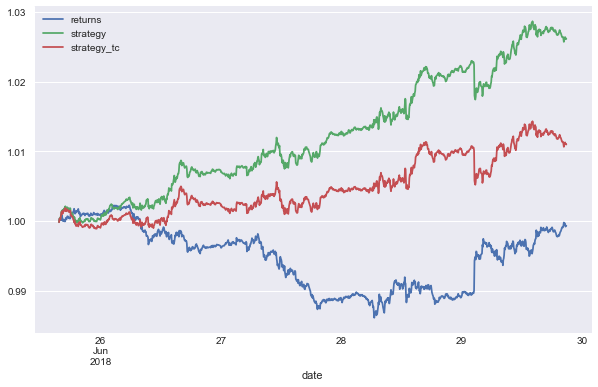

In [67]:
test[['returns', 'strategy', 'strategy_tc']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch16/auto_plot_05.png');

In [68]:
mean = test[['returns', 'strategy_tc']].mean() * len(data) * 12  
mean

returns       -0.040535
strategy_tc    0.654711
dtype: float64

In [69]:
var = test[['returns', 'strategy_tc']].var() * len(data) * 12  
var

returns        0.007861
strategy_tc    0.007837
dtype: float64

In [70]:
vol = var ** 0.5  
vol

returns        0.088663
strategy_tc    0.088524
dtype: float64

In [71]:
mean / var  

returns        -5.156448
strategy_tc    83.545792
dtype: float64

In [72]:
mean / var * 0.5  

returns        -2.578224
strategy_tc    41.772896
dtype: float64

In [73]:
to_plot = ['returns', 'strategy_tc']  

In [74]:
for lev in [10, 20, 30, 40, 50]:  
    label = 'lstrategy_tc_%d' % lev  
    test[label] = test['strategy_tc'] * lev  
    to_plot.append(label)  

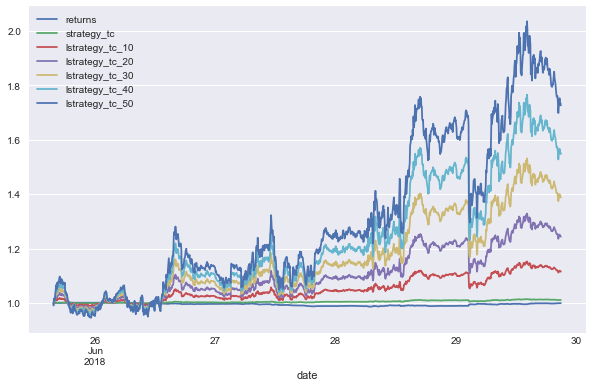

In [75]:
test[to_plot].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch16/auto_plot_06.png');

### Risk Analysis

In [76]:
equity = 3333  

In [77]:
risk = pd.DataFrame(test['lstrategy_tc_30'])  

In [78]:
risk['equity'] = risk['lstrategy_tc_30'].cumsum().apply(np.exp) * equity  

In [79]:
risk['cummax'] = risk['equity'].cummax()  

In [80]:
risk['drawdown'] = risk['cummax'] - risk['equity']  

In [81]:
risk['drawdown'].max()  

781.7073602069818

In [82]:
t_max = risk['drawdown'].idxmax()  
t_max  

Timestamp('2018-06-29 02:45:00')

In [83]:
temp = risk['drawdown'][risk['drawdown'] == 0]  

In [84]:
periods = (temp.index[1:].to_pydatetime() -
           temp.index[:-1].to_pydatetime())  

In [85]:
periods[20:30]  

array([datetime.timedelta(seconds=68700),
       datetime.timedelta(seconds=72000),
       datetime.timedelta(seconds=1800), datetime.timedelta(seconds=300),
       datetime.timedelta(seconds=600), datetime.timedelta(seconds=300),
       datetime.timedelta(seconds=17400),
       datetime.timedelta(seconds=4500), datetime.timedelta(seconds=1500),
       datetime.timedelta(seconds=900)], dtype=object)

In [86]:
t_per = periods.max()  

In [87]:
t_per  

datetime.timedelta(seconds=76500)

In [88]:
t_per.seconds / 60 / 60  

21.25

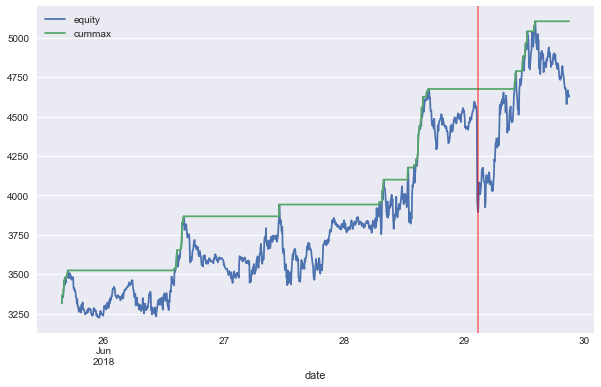

In [89]:
risk[['equity', 'cummax']].plot(figsize=(10, 6))
plt.axvline(t_max, c='r', alpha=0.5);
# plt.savefig('../../images/ch16/auto_plot_07.png');

In [90]:
import scipy.stats as scs

In [91]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]  

In [92]:
risk['returns'] = np.log(risk['equity'] /
                         risk['equity'].shift(1))

In [93]:
VaR = scs.scoreatpercentile(equity * risk['returns'], percs)  

In [94]:
def print_var():
    print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
    print(33 * '-')
    for pair in zip(percs, VaR):
        print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))   

In [95]:
print_var()  

Confidence Level    Value-at-Risk
---------------------------------
           99.99          400.854
           99.90          175.932
           99.00           88.139
           97.50           60.485
           95.00           45.010
           90.00           32.056


In [96]:
hourly = risk.resample('1H', label='right').last()  

In [97]:
hourly['returns'] = np.log(hourly['equity'] /
                         hourly['equity'].shift(1))

In [98]:
VaR = scs.scoreatpercentile(equity * hourly['returns'], percs)  

In [99]:
print_var()

Confidence Level    Value-at-Risk
---------------------------------
           99.99          389.524
           99.90          372.657
           99.00          205.662
           97.50          186.999
           95.00          164.869
           90.00          101.835


### Persisting the Model Object

In [100]:
import pickle

In [101]:
pickle.dump(model, open('algorithm.pkl', 'wb'))

## Online Algorithm

In [102]:
algorithm = pickle.load(open('algorithm.pkl', 'rb'))

In [103]:
algorithm

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']  

In [105]:
def print_positions(pos):
    print('\n\n' + 50 * '=')
    print('Going {}.\n'.format(pos))
    time.sleep(1.5)  
    print(api.get_open_positions()[sel])  
    print(50 * '=' + '\n\n')

In [106]:
symbol = 'EUR/USD'  
bar = '15s'  
amount = 100  
position = 0   
min_bars = lags + 1  
df = pd.DataFrame()  

In [107]:
def automated_strategy(data, dataframe):
    global min_bars, position, df
    ldf = len(dataframe)        
    df = dataframe.resample(bar, label='right').last().ffill()  
    if ldf % 20 == 0:
        print('%3d' % len(dataframe), end=',')
    
    if len(df) > min_bars:
        min_bars = len(df)
        df['Mid'] = df[['Bid', 'Ask']].mean(axis=1)
        df['Returns'] = np.log(df['Mid'] / df['Mid'].shift(1))
        df['Direction'] = np.where(df['Returns'] > 0, 1, -1)
        features = df['Direction'].iloc[-(lags + 1):-1]  
        features = features.values.reshape(1, -1)  
        signal = algorithm.predict(features)[0]  

        if position in [0, -1] and signal == 1:  
            api.create_market_buy_order(
                symbol, amount - position * amount)
            position = 1
            print_positions('LONG')
            
        elif position in [0, 1] and signal == -1:  
            api.create_market_sell_order(
                symbol, amount + position * amount)
            position = -1
            print_positions('SHORT')
        
    if len(dataframe) > 350:  
        api.unsubscribe_market_data('EUR/USD')
        api.close_all()

In [108]:
# api.subscribe_market_data(symbol, (automated_strategy,))

In [109]:
# api.unsubscribe_market_data(symbol) 

In [110]:
# api.close_all()

## Logging and Monitoring

In [111]:
!cat automated_strategy.py

#
# Automated ML-Based Trading Strategy for FXCM
# Online Algorithm, Logging, Monitoring
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import zmq
import time
import pickle
import fxcmpy
import numpy as np
import pandas as pd
import datetime as dt

sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']

log_file = 'automated_strategy.log'

# loads the persisted algorithm object
algorithm = pickle.load(open('algorithm.pkl', 'rb'))

# sets up the socket communication via ZeroMQ (here: "publisher")
context = zmq.Context()
socket = context.socket(zmq.PUB)

# this binds the socket communication to all IP addresses of the machine
socket.bind('tcp://0.0.0.0:5555')


def logger_monitor(message, time=True, sep=True):
    ''' Custom logger and monitor function.
    '''
    with open(log_file, 'a') as f:
        t = str(dt.datetime.now())
        msg = ''
        if time:
            msg += '\n' + t + '\n'
        if sep:
            msg += 66 * '=' + '\n'
        msg +

In [112]:
!cat strategy_monitoring.py

#
# Automated ML-Based Trading Strategy for FXCM
# Strategy Monitoring via Socket Communication
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import zmq

# sets up the socket communication via ZeroMQ (here: "subscriber")
context = zmq.Context()
socket = context.socket(zmq.SUB)

# adjust the IP address to reflect the remote location if necessary
socket.connect('tcp://206.189.51.42:5555')

# configures the socket to retrieve every message
socket.setsockopt_string(zmq.SUBSCRIBE, '')

while True:
    msg = socket.recv_string()
    print(msg)


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>